In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import os

In [2]:
def transpose_data(data):
    data_by_name = {'param':[]}
    for param in data.keys():
        metric = data[param]
        for metric_name in metric.keys():
            if metric_name not in data_by_name.keys(): data_by_name[metric_name] = []
            data_by_name[metric_name].append(metric[metric_name])
        data_by_name['param'].append(int(param))
    df = pd.DataFrame(data_by_name)
    return df

In [11]:
root = '../../results/'
hdbscan_files = ['hdbscan_eom_full','hdbscan_eom_mom_vel','hdbscan_leaf_full','hdbscan_leaf_mom_vel']
gmm_files = ['gaussian_mixture_full', 'gaussian_mixture_mom_vel']
spectral_files = ['SpectralEdge2Cluster_test_GAN','SpectralEdge2Cluster_test_GANOrig_100',\
                  'SpectralEdge2Cluster_test_GANOrig_mom_vel_250','SpectralEdge2Cluster_test_GANOrig_mom_vel_250_log',\
                    'SpectralEdge2Cluster_test_GANOrig','SpectralEdge2Cluster_test_GANOrig_log',\
                    'SpectralEdge2Cluster_test']

In [12]:
plt.rcParams["figure.autolayout"] = True

In [13]:
def plot_files(files, save_name):
    df_list = []
    for file in files:
        file_path = os.path.join(root, file+'.json')
        with open(file_path, 'r') as f:
            data = json.load(f)
        df = transpose_data(data)
        df['algo'] = file
        df_list.append(df)
    df_total = pd.concat(df_list, ignore_index=True)
    sns.scatterplot(data=df_total, x='IoU_recall', y='IoU_precision', hue='algo', style='algo')
    plt.legend(bbox_to_anchor=(1, 1), borderaxespad=0)
    plt.savefig(f'../../images/{save_name}.png', dpi=300)


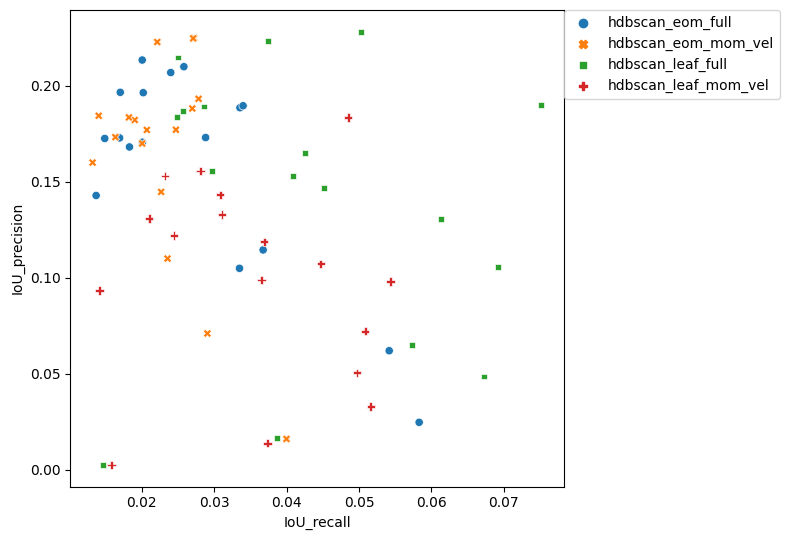

In [14]:
plt.rcParams["figure.figsize"] = [8.00, 5.50]
plot_files(hdbscan_files, 'hdbscan')

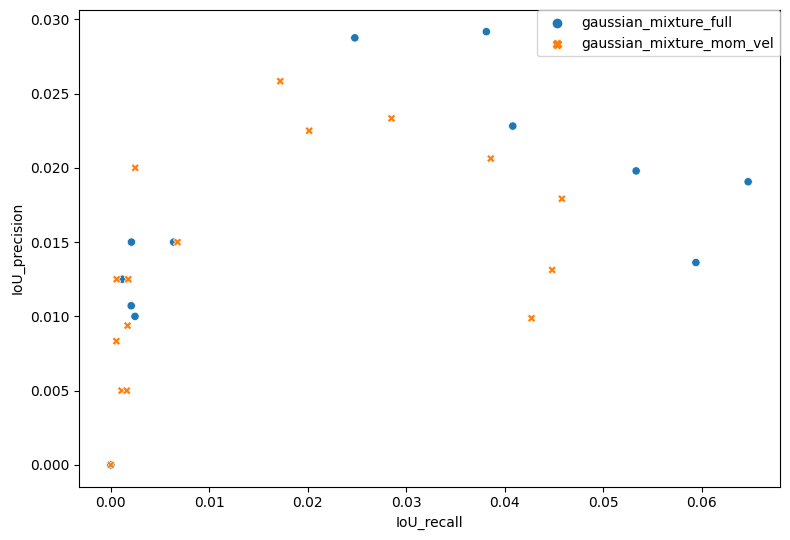

In [15]:
plot_files(gmm_files, 'gaussian_mixture')

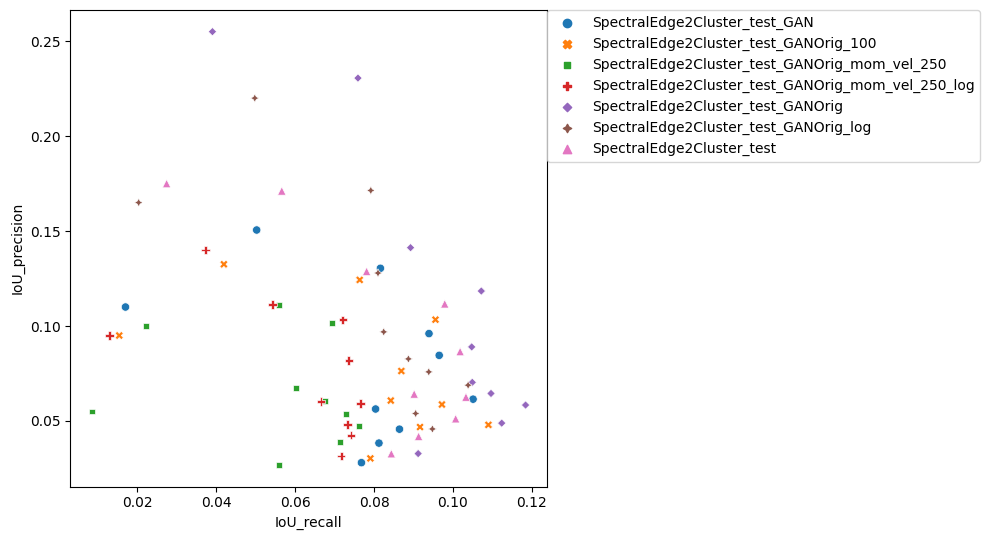

In [16]:
plt.rcParams["figure.figsize"] = [10.00, 5.50]
plot_files(spectral_files, 'spectral')

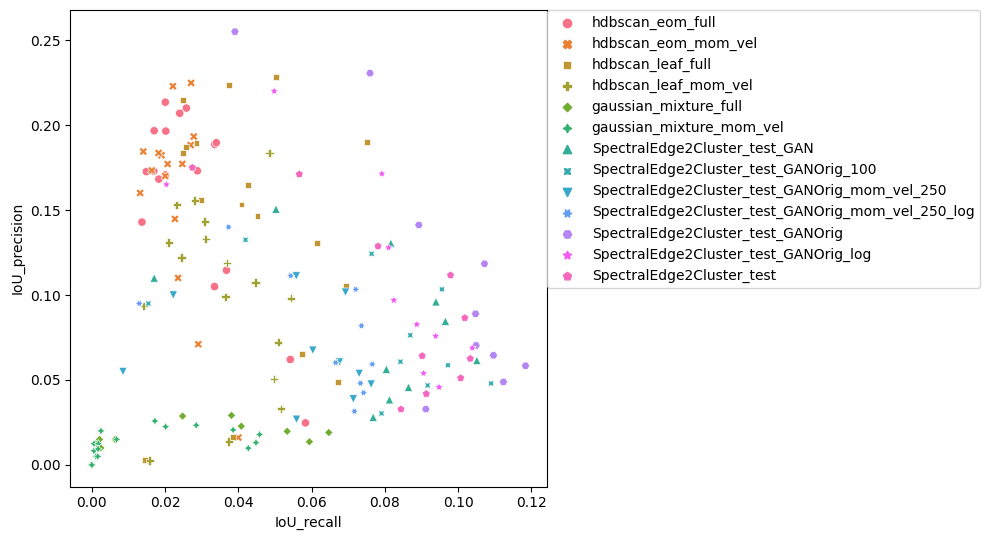

In [17]:
plot_files(hdbscan_files+gmm_files+spectral_files, 'hdbscan_gmm_spectral')

In [3]:
result_file = '../../results/hdbscan_eom_full.json'
with open(result_file, 'r') as f:
    data = json.load(f)
df = transpose_data(data)

<Axes: xlabel='IoU_recall', ylabel='IoU_precision'>

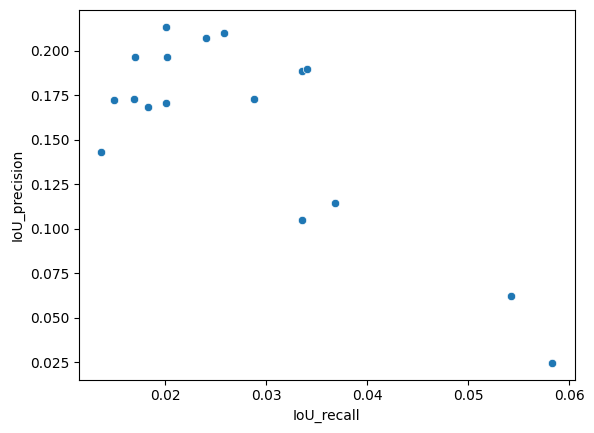

In [4]:
sns.scatterplot(data=df, x='IoU_recall', y='IoU_precision')

<Axes: xlabel='param', ylabel='IoU_F1'>

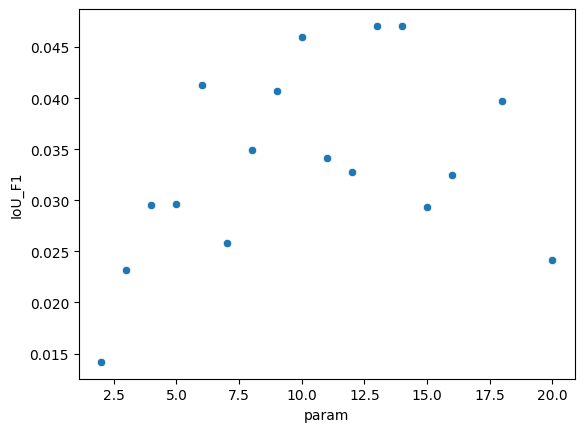

In [7]:
sns.scatterplot(data=df, x='param', y='IoU_F1')

In [8]:
result_file2 = '../../results/gaussian_mixture.json'
with open(result_file2, 'r') as f:
    data2 = json.load(f)
df2 = transpose_data(data2)

<Axes: xlabel='IoU_recall', ylabel='IoU_precision'>

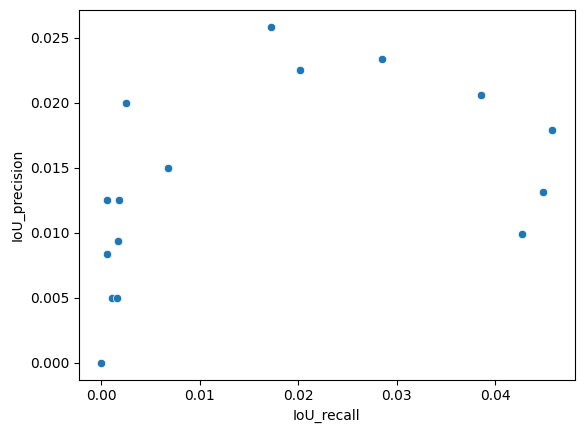

In [9]:
sns.scatterplot(data=df2, x='IoU_recall', y='IoU_precision')

<Axes: xlabel='param', ylabel='IoU_recall'>

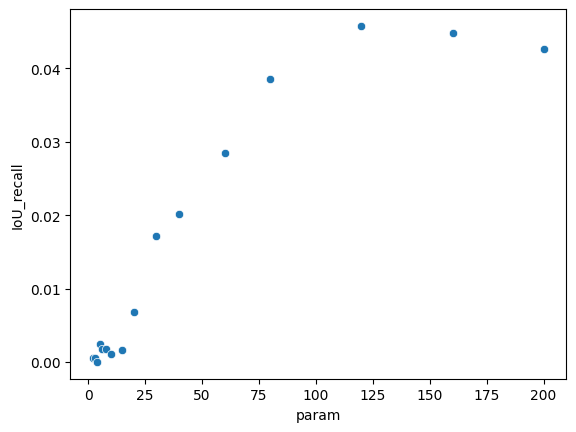

In [10]:
sns.scatterplot(data=df2, x='param', y='IoU_recall')

In [11]:
result_file = '../../results/hdbscan_leaf.json'
with open(result_file, 'r') as f:
    data = json.load(f)
df3 = transpose_data(data)

In [12]:
result_file = '../../../StellarCluster/results/SpectralEdge2Cluster_test.json'
with open(result_file, 'r') as f:
    data = json.load(f)
df4 = transpose_data(data)

In [13]:
result_file = '../../../StellarCluster/results/SpectralEdge2Cluster_test_GAN.json'
with open(result_file, 'r') as f:
    data = json.load(f)
df5 = transpose_data(data)

In [14]:
result_file = '../../../StellarCluster/results/SpectralEdge2Cluster_test_GANOrig.json'
with open(result_file, 'r') as f:
    data = json.load(f)
df6 = transpose_data(data)

In [15]:
result_file = '../../../StellarCluster/results/SpectralEdge2Cluster_test_GANOrig_mom_vel_250.json'
with open(result_file, 'r') as f:
    data = json.load(f)
df7 = transpose_data(data)

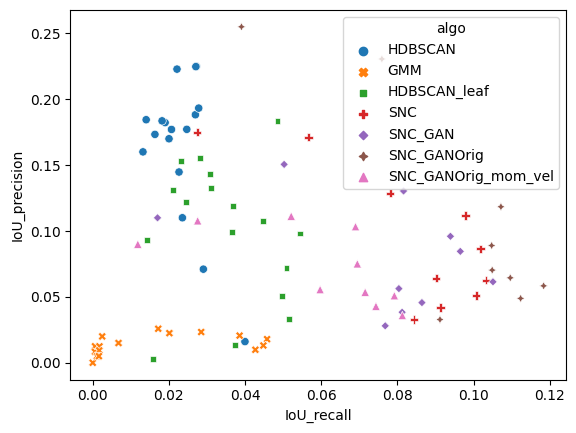

In [18]:
df['algo'] = 'HDBSCAN'
df2['algo'] = 'GMM'
df3['algo'] = 'HDBSCAN_leaf'
df4['algo'] = 'SNC'
df5['algo'] = 'SNC_GAN'
df6['algo'] = 'SNC_GANOrig'
df7['algo'] = 'SNC_GANOrig_mom_vel'
df_total = pd.concat([df, df2, df3, df4, df5, df6, df7], ignore_index=True)
plot = sns.scatterplot(data=df_total, x='IoU_recall', y='IoU_precision', hue='algo', style='algo')

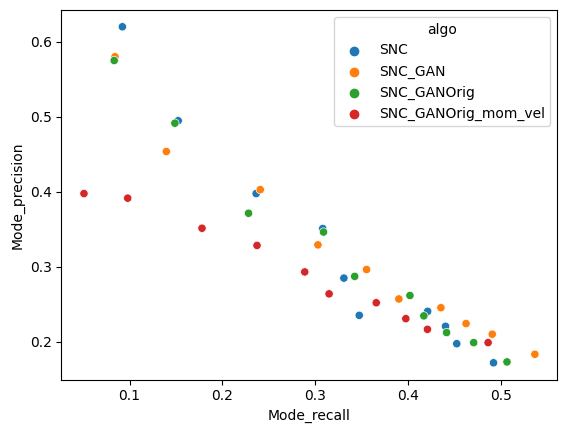

In [17]:
plot = sns.scatterplot(data=df_total, x='Mode_recall', y='Mode_precision', hue='algo')

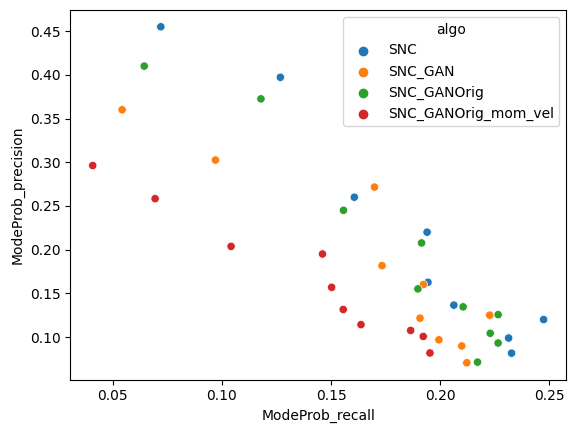

In [14]:
plot = sns.scatterplot(data=df_total, x='ModeProb_recall', y='ModeProb_precision', hue='algo')

In [15]:
df_total.head()

,param,IoU_TP,IoU_T,IoU_P,IoU_precision,IoU_recall,IoU_F1,Mode_TP,Mode_T,Mode_P,...,Purity,AMI,ARand,ModeProb_TP,ModeProb_T,ModeProb_P,ModeProb_precision,ModeProb_recall,ModeProb_F1,algo
0,2,2.775,41.475,169.875,0.012505,0.056666,0.020436,6.025,41.475,169.875,...,0.338370,0.123753,0.016619,9.175,41.475,169.875,0.093202,0.200862,0.082378,HDBSCAN
1,3,2.875,40.825,45.025,0.074006,0.056538,0.045452,4.775,40.825,45.025,...,0.253493,0.104164,0.012463,6.550,40.825,45.025,0.223314,0.136493,0.121081,HDBSCAN
2,4,3.225,42.000,30.575,0.090882,0.065611,0.065453,5.400,42.000,30.575,...,0.243698,0.115048,0.015586,6.625,42.000,30.575,0.263525,0.142758,0.151977,HDBSCAN
3,5,2.000,41.900,15.625,0.135651,0.040305,0.052445,3.500,41.900,15.625,...,0.211101,0.086187,0.007637,4.250,41.900,15.625,0.316583,0.095135,0.127791,HDBSCAN
4,6,2.250,41.625,9.825,0.175292,0.046136,0.066483,3.675,41.625,9.825,...,0.208677,0.086008,0.010292,3.650,41.625,9.825,0.346580,0.082224,0.122128,HDBSCAN
